Stephanie's test of clusterless decoding!

We first set the `SortGroup` to define which contacts are sorted together.

We then setup for spike sorting by bandpass filtering and whitening the data via the `SpikeSortingRecording` table.


In [ ]:
import spyglass.spikesorting.v1 as sgs
from spyglass.utils.nwb_helper_fn import get_nwb_copy_filename
import spyglass.data_import as sgi
import spyglass.position as sgp
from spyglass.common import Nwbfile

nwb_file_name = "IM-1875_darling_20250720.nwb"
nwb_copy_file_name = get_nwb_copy_filename(nwb_file_name)

# We only have one epoch (epoch 0) for Berke lab, so "00_r1" is always the interval list name
# This refers to the fact that it is epoch 0, ("00"), and is the first run epoch ("r1")
# This naming matches the Frank Lab convention
interval_list_name = "00_r1"

sgs.SortGroup.set_group_by_shank(nwb_file_name=nwb_copy_file_name)

sort_group_ids = (sgs.SortGroup & {"nwb_file_name": nwb_copy_file_name}).fetch(
    "sort_group_id"
)

[12:43:15][INFO] Spyglass: Path Found : ['`common_session`.`_session`', '`spikesorting_v1_recording`.`sort_...
[12:43:15][INFO] Spyglass: Checking  0: SortGroup -> ['Session', 'SortGroupSortGroupElectrode']
[12:43:15][INFO] Spyglass: Bridge Link: SortGroup -> Session: result partial
[12:43:15][INFO] Spyglass: Checking  1: Session -> ['Nwbfile', 'Subject', 'Institution', 'Lab', 'SessionDat...
[12:43:15][INFO] Spyglass: Banned Tbl : Nwbfile
[12:43:15][INFO] Spyglass: Banned Tbl : Subject
[12:43:15][INFO] Spyglass: Banned Tbl : Institution
[12:43:15][INFO] Spyglass: Banned Tbl : Lab
[12:43:15][INFO] Spyglass: Banned Tbl : SessionDataAcquisitionDevice
[12:43:15][INFO] Spyglass: Banned Tbl : SessionExperimenter
[12:43:15][INFO] Spyglass: Banned Tbl : SortGroupSortGroupElectrode
[12:43:15][INFO] Spyglass: Queueing delete for session(s):
*nwb_file_name *lab_member_na
+------------+ +------------+
IM-1875_darlin Stephanie Crat
 (Total: 1)

[2025-08-19 12:43:15,288][INFO]: Deleting 113 rows fro

recording_id,nwb_file_name name of the NWB file,sort_group_id,interval_list_name descriptive name of this interval list,preproc_param_name,team_name
7ae104cd-b080-4d81-a2b7-1a778e7cb30b,IM-1875_darling_20250720_.nwb,5,00_r1,default,Berke lab and friends


[12:44:33][INFO] Spyglass: Writing new NWB file IM-1875_darling_20250720_R9PSKI9FTO.nwb
[12:59:01][WARNING] Spyglass: Found 0 files for: IM-1875_darling_20250720_R9PSKI9FTO.nwb
IM-1875_darling_20250720_R9PSKI9FTO: 100%|██████████| 394/394 [24:39<00:00,  3.76s/it]  
[2025-08-19 13:24:19,631][WARNING]: Skipped checksum for file with hash: cbe4924c-b563-f3e4-74cd-cb38556074a0, and path: /stelmo/nwb/analysis/IM-1875_darling_20250720/IM-1875_darling_20250720_R9PSKI9FTO.nwb
[13:24:25][WARNING] Spyglass: PyNWB version mismatch. Skipping key: {'recording_id': UUID('7ae104cd-b080-4d81-a2b7-1a778e7cb30b')}
	Have: {'core': '2.7.0', 'hdmf-common': '1.8.0', 'hdmf-experimental': '0.5.0', 'ndx-franklab-novela': '0.2.0', 'ndx-optogenetics': '0.2.0', 'ndx-pose': '0.2.0'}
	Need: {'core': '2.7.0', 'hdmf-common': '1.8.0', 'hdmf-experimental': '0.5.0', 'ndx-fiber-photometry': '0.1.0', 'ndx-franklab-novela': '0.2.0', 'ndx-optogenetics': '0.2.0', 'ndx-pose': '0.2.0'}


{'success_count': 1, 'error_list': []}

In [ ]:
from spyglass.spikesorting.v1.recording import SortGroup

# Here I am just displaying stuff to look at what my SortGroups look like.

display(SortGroup & {"nwb_file_name": nwb_copy_file_name})

display(SortGroup.SortGroupElectrode() & {"nwb_file_name": nwb_copy_file_name})

nwb_file_name name of the NWB file,sort_group_id,sort_reference_electrode_id the electrode to use for referencing
IM-1875_darling_20250720_.nwb,0,-1
IM-1875_darling_20250720_.nwb,1,-1
IM-1875_darling_20250720_.nwb,2,-1
IM-1875_darling_20250720_.nwb,3,-1
IM-1875_darling_20250720_.nwb,4,-1
IM-1875_darling_20250720_.nwb,5,-1
IM-1875_darling_20250720_.nwb,6,-1
IM-1875_darling_20250720_.nwb,7,-1
IM-1875_darling_20250720_.nwb,8,-1
IM-1875_darling_20250720_.nwb,9,-1


nwb_file_name name of the NWB file,sort_group_id,electrode_group_name electrode group name from NWBFile,electrode_id the unique number for this electrode
IM-1875_darling_20250720_.nwb,0,2,24
IM-1875_darling_20250720_.nwb,0,2,25
IM-1875_darling_20250720_.nwb,0,2,26
IM-1875_darling_20250720_.nwb,0,2,28
IM-1875_darling_20250720_.nwb,1,8,103
IM-1875_darling_20250720_.nwb,1,8,104
IM-1875_darling_20250720_.nwb,1,8,106
IM-1875_darling_20250720_.nwb,2,9,112
IM-1875_darling_20250720_.nwb,2,9,113
IM-1875_darling_20250720_.nwb,2,9,114


In [ ]:
# I'm just using one shank for now! for speed. This one is channels 82-93 (I have spikes there)
sort_group_ids = [5]

group_keys = []
for sort_group_id in sort_group_ids:
    key = {
        "nwb_file_name": nwb_copy_file_name,
        "sort_group_id": sort_group_id,
        "interval_list_name": interval_list_name,
        "preproc_param_name": "default",
        "team_name": "Berke lab and friends",
    }
    sgs.SpikeSortingRecordingSelection.insert_selection(key)

    group_keys.append((sgs.SpikeSortingRecordingSelection & key).fetch1("KEY"))

    display(sgs.SpikeSortingRecordingSelection & key)

sgs.SpikeSortingRecording.populate(group_keys)

Next we do artifact detection. Here we skip it by setting the `artifact_param_name` to `None`, but in practice you should detect artifacts as it will affect the decoding.


In [3]:
recording_ids = (
    sgs.SpikeSortingRecordingSelection & {"nwb_file_name": nwb_copy_file_name}
).fetch("recording_id")

group_keys = []
for recording_id in recording_ids:
    key = {
        "recording_id": recording_id,
        "artifact_param_name": "none",
    }
    group_keys.append(key)
    sgs.ArtifactDetectionSelection.insert_selection(key)

sgs.ArtifactDetection.populate(group_keys)

[2025-08-19 13:52:52,228][WARNING]: Skipped checksum for file with hash: cbe4924c-b563-f3e4-74cd-cb38556074a0, and path: /stelmo/nwb/analysis/IM-1875_darling_20250720/IM-1875_darling_20250720_R9PSKI9FTO.nwb
[13:53:14][INFO] Spyglass: Amplitude and zscore thresholds are both None, skipping artifact detection


{'success_count': 1, 'error_list': []}

Now we run the "spike sorting", which in our case is simply thresholding the signal to find spikes. We use the `SpikeSorting` table to store the results. Note that `sorter_param_name` defines the parameters for thresholding the signal.


In [26]:
(
    sgs.SpikeSorterParameters()
    & {"sorter": "clusterless_thresholder", "sorter_param_name": "default_clusterless"}
).fetch("sorter_params")

array([{'detect_threshold': 100.0, 'method': 'locally_exclusive', 'peak_sign': 'neg', 'exclude_sweep_ms': 0.1, 'local_radius_um': 100, 'noise_levels': array([1.]), 'random_chunk_kwargs': {}, 'outputs': 'sorting'}],
      dtype=object)

In [8]:
group_keys = []
for recording_id in recording_ids:
    key = {
        "recording_id": recording_id,
        "sorter": "clusterless_thresholder",
        "sorter_param_name": "default_clusterless",
        "nwb_file_name": nwb_copy_file_name,
        "interval_list_name": str(
            (
                sgs.ArtifactDetectionSelection
                & {"recording_id": recording_id, "artifact_param_name": "none"}
            ).fetch1("artifact_id")
        ),
    }
    group_keys.append(key)
    sgs.SpikeSortingSelection.insert_selection(key)
sort_keys = (sgs.SpikeSortingSelection & group_keys).fetch("KEY")
sgs.SpikeSorting.populate(sort_keys)

[13:57:15][WARNING] Spyglass: Turning off transaction protection this table by default. Use use_transation=True to re-enable.
Read more about transactions:
https://docs.datajoint.io/python/definition/05-Transactions.html
https://github.com/LorenFrankLab/spyglass/issues/1030
[2025-08-19 13:57:23,561][WARNING]: Skipped checksum for file with hash: cbe4924c-b563-f3e4-74cd-cb38556074a0, and path: /stelmo/nwb/analysis/IM-1875_darling_20250720/IM-1875_darling_20250720_R9PSKI9FTO.nwb
[2025-08-19 13:57:25,141][WARNING]: Skipped checksum for file with hash: cbe4924c-b563-f3e4-74cd-cb38556074a0, and path: /stelmo/nwb/analysis/IM-1875_darling_20250720/IM-1875_darling_20250720_R9PSKI9FTO.nwb


detect peaks using locally_exclusive:   0%|          | 0/7356 [00:00<?, ?it/s]

[13:58:38][INFO] Spyglass: Writing new NWB file IM-1875_darling_20250720_ENFJCCA9A6.nwb
[2025-08-19 13:59:27,377][WARNING]: Skipped checksum for file with hash: cbe4924c-b563-f3e4-74cd-cb38556074a0, and path: /stelmo/nwb/analysis/IM-1875_darling_20250720/IM-1875_darling_20250720_R9PSKI9FTO.nwb


For clusterless decoding we do not need any manual curation, but for the sake of the pipeline, we need to store the output of the thresholding in the `CurationV1` table and insert this into the `SpikeSortingOutput` table.


In [9]:
sgs.SpikeSorting().populate(
    sgs.SpikeSortingSelection
    & {
        "nwb_file_name": nwb_copy_file_name,
        "sorter": "clusterless_thresholder",
        "sorter_param_name": "default_clusterless",
    }
)

[14:01:15][WARNING] Spyglass: Turning off transaction protection this table by default. Use use_transation=True to re-enable.
Read more about transactions:
https://docs.datajoint.io/python/definition/05-Transactions.html
https://github.com/LorenFrankLab/spyglass/issues/1030


In [10]:
from spyglass.spikesorting.spikesorting_merge import SpikeSortingOutput

sorting_ids = (
    sgs.SpikeSortingSelection
    & {
        "nwb_file_name": nwb_copy_file_name,
        "sorter": "clusterless_thresholder",
        "sorter_param_name": "default_clusterless",
    }
).fetch("sorting_id")

for sorting_id in sorting_ids:
    try:
        sgs.CurationV1.insert_curation(sorting_id=sorting_id)
    except KeyError:
        pass

SpikeSortingOutput.insert(
    sgs.CurationV1().fetch("KEY"),
    part_name="CurationV1",
    skip_duplicates=True,
)

[14:01:46][INFO] Spyglass: Writing new NWB file IM-1875_darling_20250720_B3QASW5HL1.nwb
[14:02:53][INFO] Spyglass: Key already in part CurationV1: {'sorting_id': UUID('a202d3e3-cd71-41e9-ac81-88322238b623'), 'curation_id': 0}
[14:02:53][INFO] Spyglass: Key already in part CurationV1: {'sorting_id': UUID('3d5d15d8-a94a-40f4-8fef-c060c986edb7'), 'curation_id': 0}
[14:02:53][INFO] Spyglass: Key already in part CurationV1: {'sorting_id': UUID('5656989d-5b97-4f54-bb85-6ac49d8de870'), 'curation_id': 0}
[14:02:53][INFO] Spyglass: Key already in part CurationV1: {'sorting_id': UUID('fb4eb9a8-f2c3-4b92-b1a9-f3b1083f5df9'), 'curation_id': 0}
[14:02:53][INFO] Spyglass: Key already in part CurationV1: {'sorting_id': UUID('044ed51f-5f2e-4a84-b303-d08d61262f01'), 'curation_id': 1}
[14:02:53][INFO] Spyglass: Key already in part CurationV1: {'sorting_id': UUID('c275f222-f490-4915-af8d-a001401fa80a'), 'curation_id': 0}
[14:02:53][INFO] Spyglass: Key already in part CurationV1: {'sorting_id': UUID('d85f

Finally, we extract the waveform features of each SortGroup. This is done by the `UnitWaveformFeatures` table.

To set this up, we use the `WaveformFeaturesParams` to define the time around the spike that we want to use for feature extraction, and which features to extract. Here is an example of the parameters used for extraction the amplitude of the negative peak of the waveform:

```python

waveform_extraction_params = {
    "ms_before": 0.5,
    "ms_after": 0.5,
    "max_spikes_per_unit": None,
    "n_jobs": 5,
    "total_memory": "5G",
}
waveform_feature_params = {
    "amplitude": {
        "peak_sign": "neg",
        "estimate_peak_time": False,
    }
}
```

We see that we want 0.5 ms of time before and after the peak of the negative spike. We also see that we want to extract the amplitude of the negative peak, and that we do not want to estimate the peak time (since we know it is at 0 ms).

You can define other features to extract such as spatial location of the spike:

```python
waveform_extraction_params = {
    "ms_before": 0.5,
    "ms_after": 0.5,
    "max_spikes_per_unit": None,
    "n_jobs": 5,
    "total_memory": "5G",
}
waveform_feature_params = {
    "amplitude": {
        "peak_sign": "neg",
        "estimate_peak_time": False,
    },
    "spike location": {}
}

```

_Note_: Members of the Frank Lab can use "ampl_10_jobs_v2" instead of "amplitude"
for significant speed improvements.


In [11]:
from spyglass.decoding.v1.waveform_features import WaveformFeaturesParams

waveform_extraction_params = {
    "ms_before": 0.5,
    "ms_after": 0.5,
    "max_spikes_per_unit": None,
    "n_jobs": 5,
    "total_memory": "5G",
}
waveform_feature_params = {
    "amplitude": {
        "peak_sign": "neg",
        "estimate_peak_time": False,
    }
}

WaveformFeaturesParams.insert1(
    {
        "features_param_name": "amplitude",
        "params": {
            "waveform_extraction_params": waveform_extraction_params,
            "waveform_feature_params": waveform_feature_params,
        },
    },
    skip_duplicates=True,
)

WaveformFeaturesParams()

features_param_name a name for this set of parameters,params the parameters for the waveform features
amplitude,=BLOB=
"amplitude,",=BLOB=
"amplitude, location, probe",=BLOB=
"amplitude, spike_location",=BLOB=
"amplitude,,",=BLOB=
amplitude_only,=BLOB=
amplitude_probe,=BLOB=
amplitude_relevant_channel,=BLOB=
"amplitude_relevant_channel,",=BLOB=
"amplitude_relevant_channel, spike_location",=BLOB=


Now that we've inserted the waveform features parameters, we need to define which parameters to use for each SortGroup. This is done by the `UnitWaveformFeaturesSelection` table. We need to link the primary key `merge_id` from the `SpikeSortingOutput` table to a features parameter set.


In [12]:
from spyglass.decoding.v1.waveform_features import UnitWaveformFeaturesSelection

UnitWaveformFeaturesSelection()

spikesorting_merge_id,features_param_name a name for this set of parameters
002f8ece-0788-06fd-5a74-177082888f52,amplitude
00341982-c320-2065-f805-02eee392e0d8,amplitude
0034ac66-7447-b0ac-891d-504c79c2d896,amplitude
003871ea-ea67-d35b-a66f-eebfcc85e2ff,amplitude
003bf29a-fa09-05be-5cac-b7ea70a48c0c,amplitude
004409c0-490c-b757-5d96-1c0c9025ad60,amplitude
004faf9a-72cb-4416-ae13-3f85d538604f,amplitude
0061a9df-3954-99d4-d738-fd13ab7119fe,amplitude
006ae77e-870f-abbc-e1fc-4c1c34c29293,amplitude
00775472-67a6-5836-b68a-d15186ae3b3c,amplitude


First we find the units we need.  We can use the method `SpikeSortingOutput.get_restricted_merge_ids()` to perform the needed joins to find them:


In [14]:
key = {
    "nwb_file_name": nwb_copy_file_name,
    "sorter": "clusterless_thresholder",
    "sorter_param_name": "default_clusterless",
}
merge_ids = SpikeSortingOutput().get_restricted_merge_ids(
    {
        "nwb_file_name": nwb_copy_file_name,
        "sorter": "clusterless_thresholder",
        "sorter_param_name": "default_clusterless",
    },
    sources=["v1"],
)
print(merge_ids)

[UUID('0bf44ff7-1e0f-e60f-cdef-d1d74ba29a9f')]


Then we link them with the features parameters:


In [15]:
selection_keys = [
    {
        "spikesorting_merge_id": merge_id,
        "features_param_name": "amplitude",
    }
    for merge_id in merge_ids
]
UnitWaveformFeaturesSelection.insert(selection_keys, skip_duplicates=True)

UnitWaveformFeaturesSelection & selection_keys

spikesorting_merge_id,features_param_name a name for this set of parameters
0bf44ff7-1e0f-e60f-cdef-d1d74ba29a9f,amplitude


Finally, we extract the waveform features, by populating the `UnitWaveformFeatures` table:


In [16]:
from spyglass.decoding.v1.waveform_features import UnitWaveformFeatures

UnitWaveformFeatures.populate(selection_keys)

[2025-08-19 14:13:12,274][WARNING]: Skipped checksum for file with hash: cbe4924c-b563-f3e4-74cd-cb38556074a0, and path: /stelmo/nwb/analysis/IM-1875_darling_20250720/IM-1875_darling_20250720_R9PSKI9FTO.nwb
[2025-08-19 14:13:52,704][WARNING]: Skipped checksum for file with hash: cbe4924c-b563-f3e4-74cd-cb38556074a0, and path: /stelmo/nwb/analysis/IM-1875_darling_20250720/IM-1875_darling_20250720_R9PSKI9FTO.nwb


extract waveforms shared_memory multi buffer:   0%|          | 0/20 [00:00<?, ?it/s]

extract waveforms memmap multi buffer:   0%|          | 0/20 [00:00<?, ?it/s]

[14:16:03][INFO] Spyglass: Writing new NWB file IM-1875_darling_20250720_03HTY3FG22.nwb
INFO:spyglass:Writing new NWB file IM-1875_darling_20250720_03HTY3FG22.nwb


{'success_count': 1, 'error_list': []}

In [17]:
UnitWaveformFeatures & selection_keys

spikesorting_merge_id,features_param_name a name for this set of parameters,analysis_file_name name of the file,object_id the NWB object that stores the waveforms
0bf44ff7-1e0f-e60f-cdef-d1d74ba29a9f,amplitude,IM-1875_darling_20250720_03HTY3FG22.nwb,399042c7-a296-4fa2-b043-76f1ca4422fb


Now that we've extracted the data, we can inspect the results. Let's fetch the data:


In [18]:
spike_times, spike_waveform_features = (
    UnitWaveformFeatures & selection_keys
).fetch_data()

Let's look at the features shape. This is a list corresponding to tetrodes, with each element being a numpy array of shape (n_spikes, n_features). The features in this case are the amplitude of each tetrode wire at the negative peak of the waveform.


In [25]:
print(spike_waveform_features[0].shape)

for features in spike_waveform_features:
    print(features.shape)

(7401977, 4)
(7401977, 4)


We can plot the amplitudes to see if there is anything that looks neural and to look for outliers:


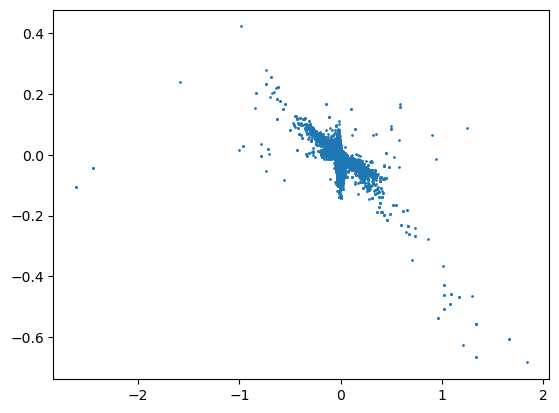

In [21]:
import matplotlib.pyplot as plt

tetrode_ind = 0
plt.scatter(
    spike_waveform_features[tetrode_ind][:, 0],
    spike_waveform_features[tetrode_ind][:, 1],
    s=1,
)